# ASTR 596: FDS Homework 6: Hunting for Exoplanets


### If you are watching Star Trek: Picard, then you might wonder about the "Admonition" - a warning/message left in an octuple planet system about past synthetic life in the Galaxy.

### [Ethan Siegel's Starts With a Bang blog has even covered it](https://www.forbes.com/sites/startswithabang/2020/03/19/is-star-trek-picards-hypothesized-octuple-star-system-really-possible/)

### The Kepler satellite has discovered many multi-planet systems. You can download artwork for some of them even at the [Exoplanet Travel Bureau](https://exoplanets.nasa.gov/alien-worlds/exoplanet-travel-bureau/)

<img src="Kepler-186f_small.jpg">


### But is there a system with 8 planets??? In fact, there may be at least one - [Kepler 90](https://www.nytimes.com/2017/12/14/science/eight-planets-star-system.html). This along with most other Kepler planets, were not discovered through radial velocity measurements like our example in class (i.e. that nice parameteric model doesn't apply), but were rather discovered through transits - dips in the light of the star as the planet moves around it.


<img src="Transiting-Exoplanet-Light-Curve.gif">

### You get to find 3 exoplanets in the Kepler-90 system with `gatspy`. 


### To get the Kepler data, you'll need the `lightkurve` package

> `conda install lightkurve`

### I've included some code to get the light curve, clean it and remove the NaNs, but not outliers (you can judge the wisdom of outlier removal when you are hunting for planets).


<hr>

#### Hints:

* `gatspy` has a `predict` method that you can use to get a model light curve for some period (you should need no more 3-5 terms). You might find it easier to remove the signal of each planet as you find it and work with the residual light curve to find the next.

* `lightkurve` has a bunch of useful [tutorials](https://docs.lightkurve.org/index.html)

* [The Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html) might be of help

<hr>

# Happy (planet) hunting!

In [1]:
%matplotlib inline
import lightkurve as lk
import gatspy
import numpy as np

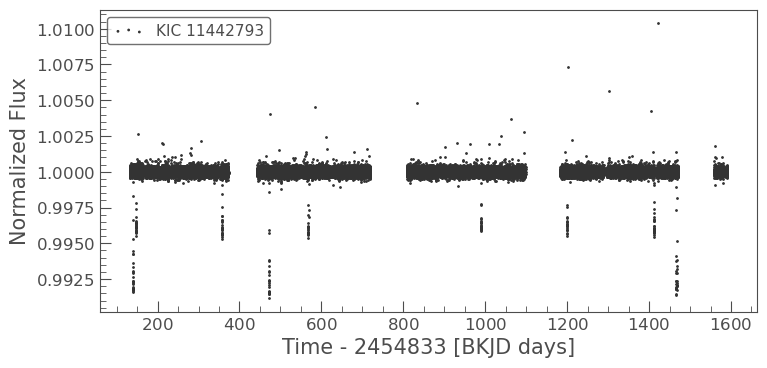

In [2]:
lcfs = lk.search_lightcurvefile('Kepler-90', mission='Kepler').download_all()

def squelch_rednoise(lc):
    corrected_lc = lc.normalize().flatten(window_length=51)
    return corrected_lc

stitched_lc = lcfs.PDCSAP_FLUX.stitch(corrector_func=squelch_rednoise)
clc = stitched_lc.remove_nans()

clc.scatter();

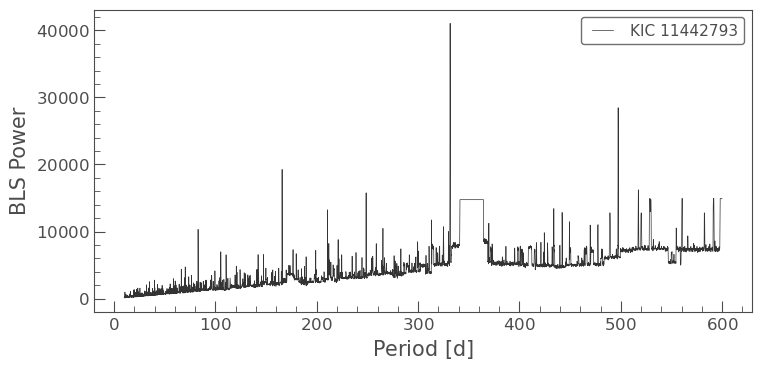

In [10]:
total_periodogram = clc.to_periodogram(method='bls', period=np.arange(10,600,0.1))
total_periodogram.plot()

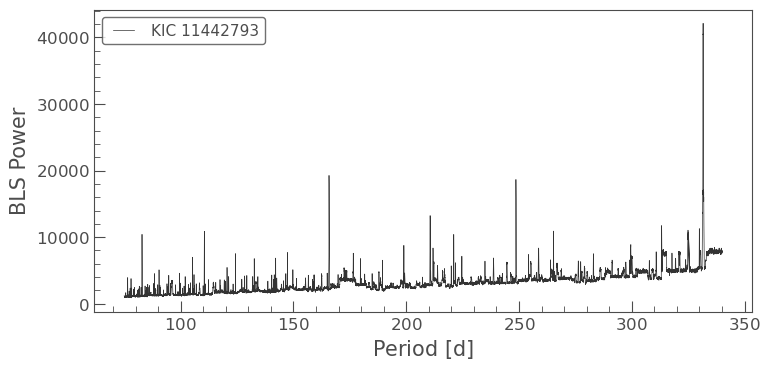

In [12]:
#that looks a bit wonky around 340 so lets cut down a little bit, and nothing interesting happening until after 80ish
#also let's increase the resolution
total_periodogram = clc.to_periodogram(method='bls', period=np.arange(75,340,0.01))
total_periodogram.plot()

In [17]:
p1_best_fit_period = total_periodogram.period_at_max_power
p1_transit_time = total_periodogram.transit_time_at_max_power
print('Best fit period: {:.3f}'.format(p1_best_fit_period))
print('Transit time: {:.3f}'.format(p1_transit_time))

Best fit period: 331.610 d
Transit time: 140.487


Text(0.5, 1.0, 'Planet 1')

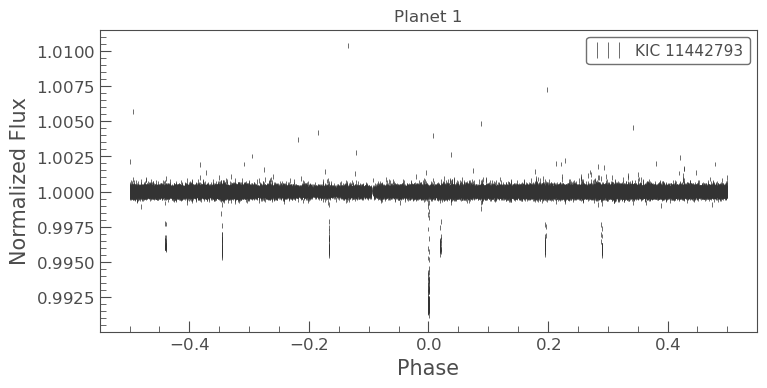

In [33]:
ax1 = clc.fold(period=p1_best_fit_period, t0=total_periodogram.transit_time_at_max_power).errorbar()
ax1.set_title('Planet 1')
ax1.set_xlim(-0.01, 0.01)

(-0.01, 0.01)

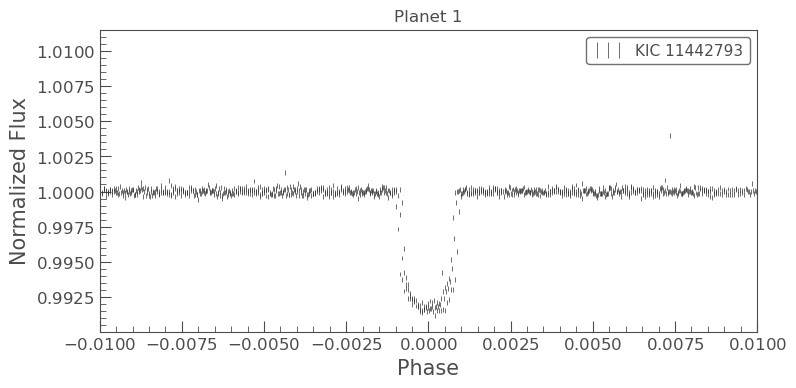

In [34]:
#there's some smaller signals in there but lets just focus on the big one
ax1 = clc.fold(period=p1_best_fit_period, t0=total_periodogram.transit_time_at_max_power).errorbar()
ax1.set_title('Planet 1')
ax1.set_xlim(-0.01, 0.01)

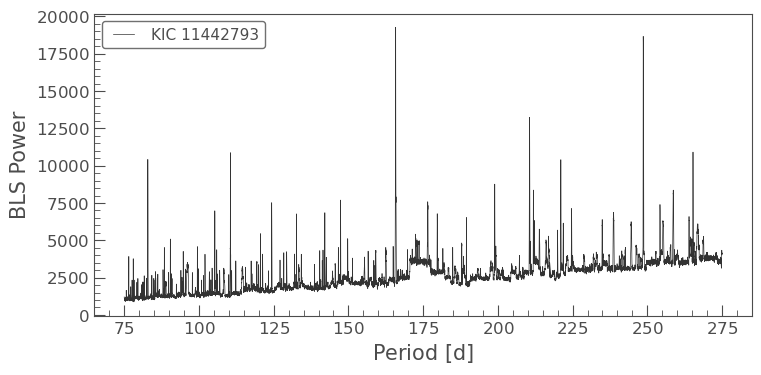

In [49]:
#i can see why we would need the mask, but in this case i don't think i do to find 3 planets. let's try out just working backwards
#and looking for planets with shorter periods than the previous
p2_periodogram = clc.to_periodogram(method='bls', period=np.arange(75,275,0.01))
p2_periodogram.plot()

In [52]:
p2_best_fit_period = p2_periodogram.period_at_max_power
p2_transit_time = p2_periodogram.transit_time_at_max_power
print('Best fit period: {:.3f}'.format(p2_best_fit_period))
print('Transit time: {:.3f}'.format(p2_transit_time))

Best fit period: 165.780 d
Transit time: 140.587


Text(0.5, 1.0, 'Planet 2')

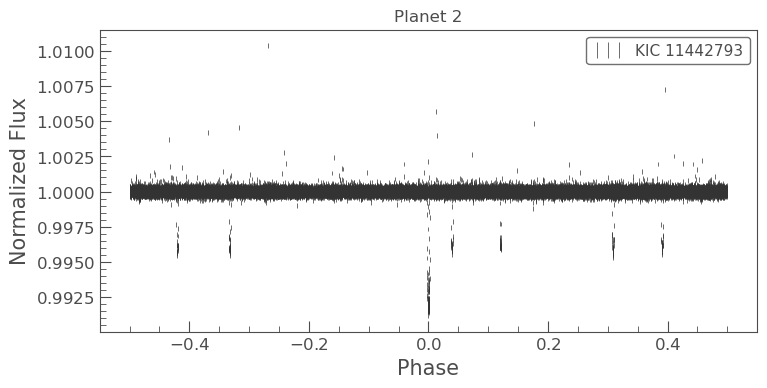

In [53]:
#our signal at 165 is a little stronger than the one at 250, but we'll come back to that one if this works.
ax2 = clc.fold(period=p2_best_fit_period, t0=p2_periodogram.transit_time_at_max_power).errorbar()
ax2.set_title('Planet 2')

(-0.02, 0.02)

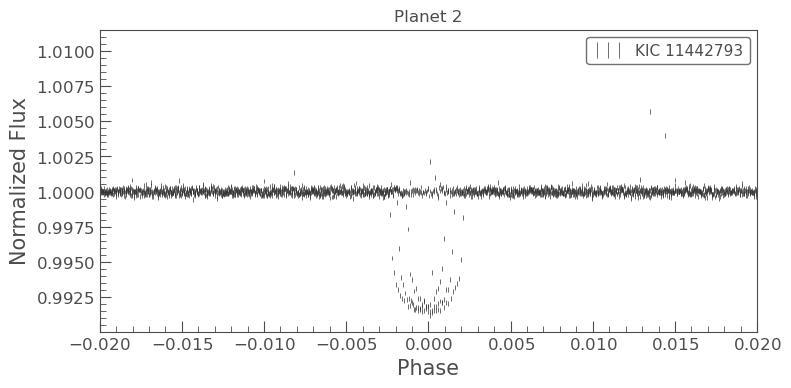

In [54]:
#again, smaller signals but we're focusing on the big one
ax2 = clc.fold(period=p2_best_fit_period, t0=p2_periodogram.transit_time_at_max_power).errorbar()
ax2.set_title('Planet 2')
ax2.set_xlim(-0.02, 0.02)

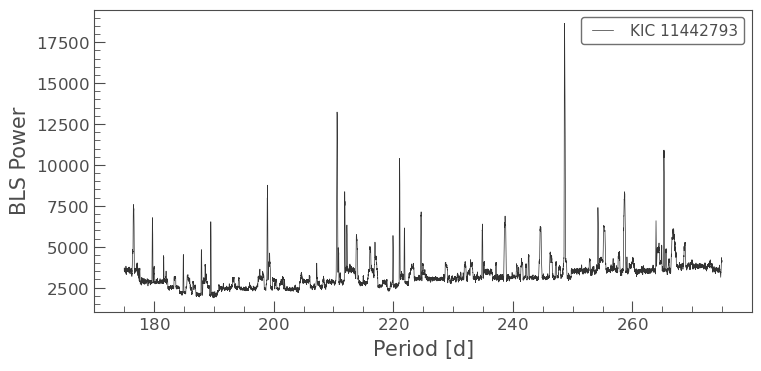

In [41]:
#that seems to work? not sure why the data looks fuzzy. onto planet 3 with the longer periodicity
p3_periodogram = clc.to_periodogram(method='bls', period=np.arange(175,275,0.01))
p3_periodogram.plot()

In [42]:
p3_best_fit_period = p3_periodogram.period_at_max_power
p3_transit_time = p3_periodogram.transit_time_at_max_power
print('Best fit period: {:.3f}'.format(p3_best_fit_period))
print('Transit time: {:.3f}'.format(p3_transit_time))

Best fit period: 248.630 d
Transit time: 223.612


(-0.02, 0.02)

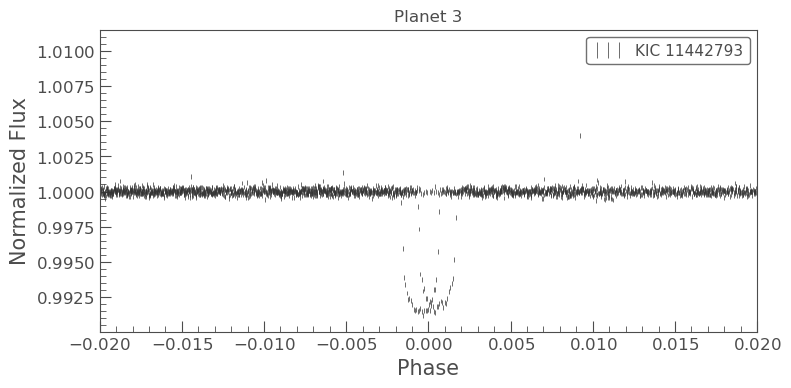

In [45]:
ax3 = clc.fold(period=p3_best_fit_period, t0=p3_periodogram.transit_time_at_max_power).errorbar()
ax3.set_title('Planet 3')
ax3.set_xlim(-0.02, 0.02)

In [56]:
print(f'Planet 1: Best fit period: {p1_best_fit_period}')
print(f'Planet 2: Best fit period: {p2_best_fit_period}')
print(f'Planet 3: Best fit period: {p3_best_fit_period}')

Planet 1: Best fit period: 331.61000000013127 d
Planet 2: Best fit period: 165.78000000004644 d
Planet 3: Best fit period: 248.62999999993303 d
